In [34]:
import pandas as pd 
import numpy as np 
import seaborn as sb 
from matplotlib import pyplot as plt
import missingno as msno
%matplotlib inline
from scipy import stats
from math import sqrt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import get_scorer_names
import shap

from pprint import pprint
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("C:/Users/Vasanth M/jupyter_codes/wild_buleberry_project/WildBlueberryPollinationSimulationData.csv")
df.head(5)

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [3]:
df.shape

(777, 18)

In [4]:
df.columns

Index(['Row#', 'clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row#                  777 non-null    int64  
 1   clonesize             777 non-null    float64
 2   honeybee              777 non-null    float64
 3   bumbles               777 non-null    float64
 4   andrena               777 non-null    float64
 5   osmia                 777 non-null    float64
 6   MaxOfUpperTRange      777 non-null    float64
 7   MinOfUpperTRange      777 non-null    float64
 8   AverageOfUpperTRange  777 non-null    float64
 9   MaxOfLowerTRange      777 non-null    float64
 10  MinOfLowerTRange      777 non-null    float64
 11  AverageOfLowerTRange  777 non-null    float64
 12  RainingDays           777 non-null    float64
 13  AverageRainingDays    777 non-null    float64
 14  fruitset              777 non-null    float64
 15  fruitmass             7

In [6]:
df.nunique()

Row#                    777
clonesize                 6
honeybee                  7
bumbles                  10
andrena                  12
osmia                    12
MaxOfUpperTRange          5
MinOfUpperTRange          5
AverageOfUpperTRange      5
MaxOfLowerTRange          5
MinOfLowerTRange          5
AverageOfLowerTRange      5
RainingDays               5
AverageRainingDays        5
fruitset                777
fruitmass               777
seeds                   777
yield                   777
dtype: int64

<AxesSubplot: >

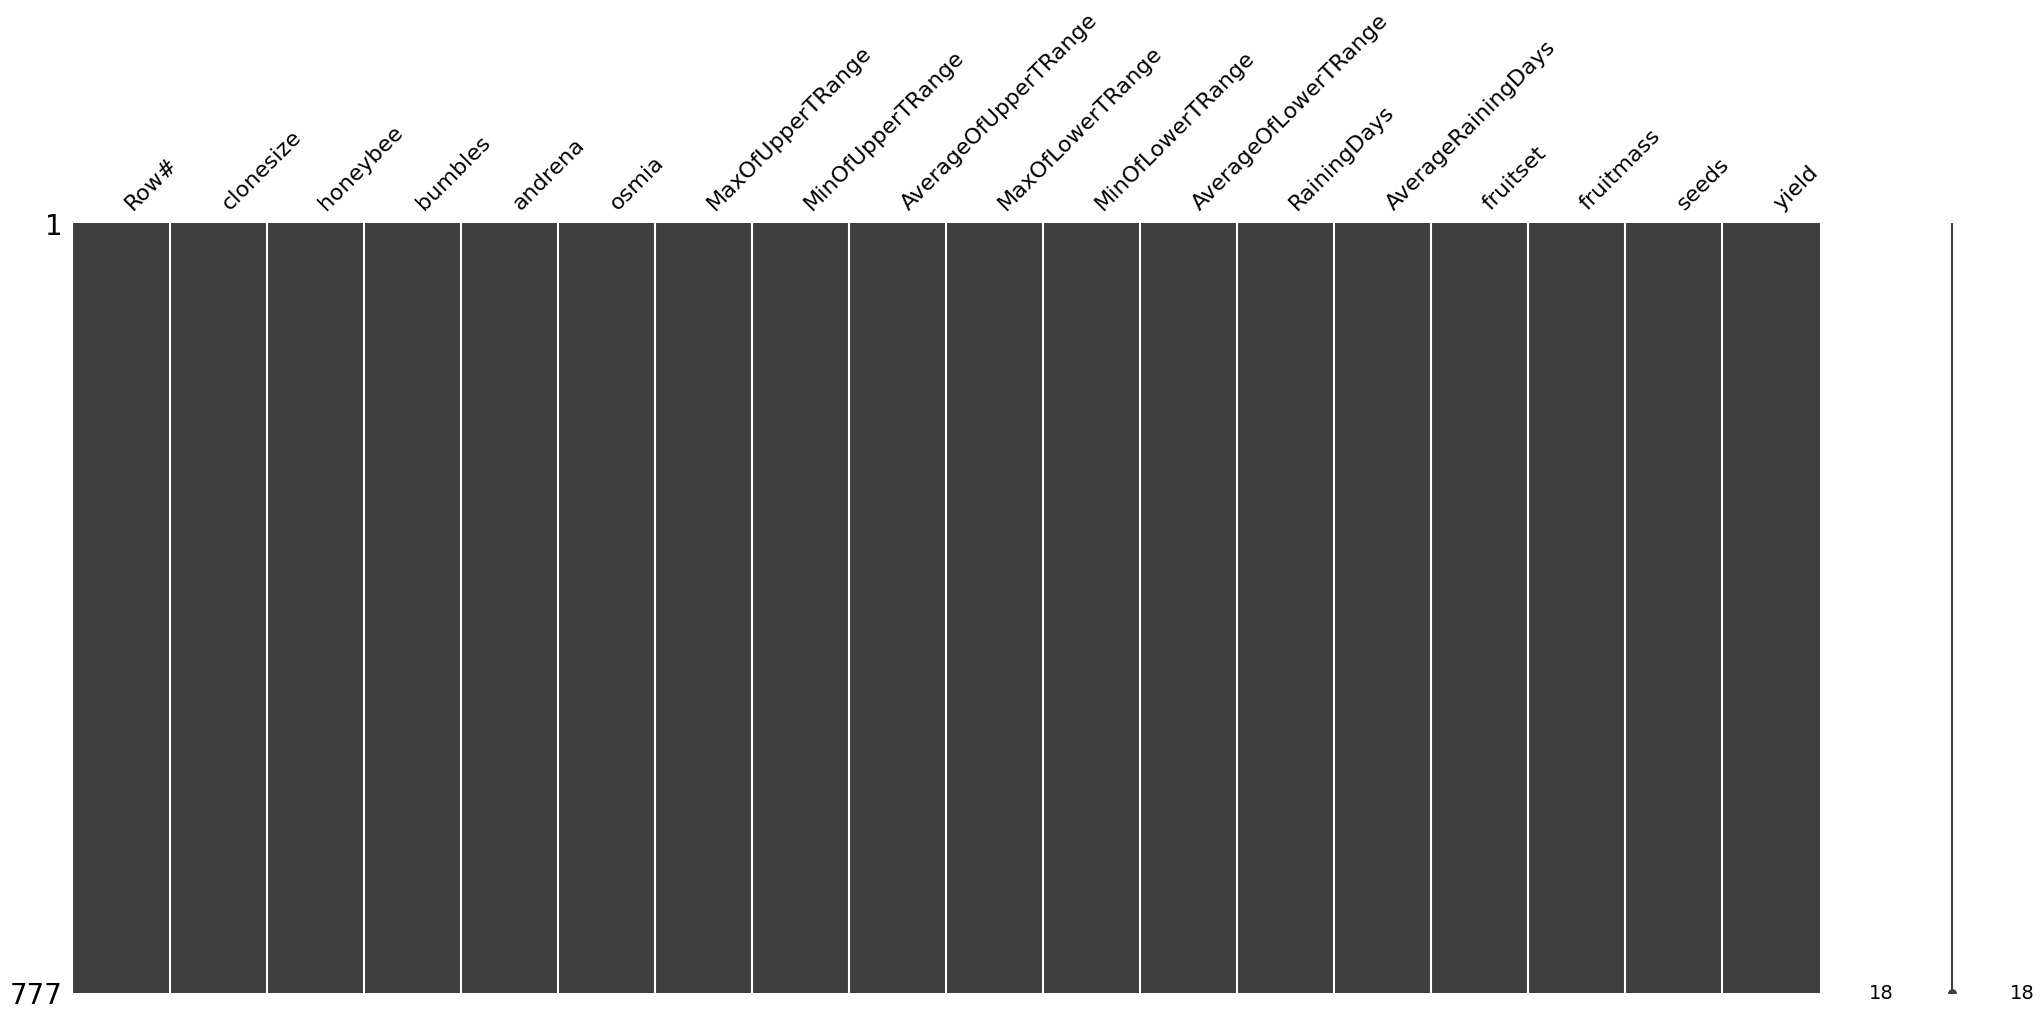

In [7]:
msno.matrix(df)

Number of observations: 777
Number of columns: 17
Memory Usage: 100+ KB
Number of boolean columns: 0
Number of category columns: 0
Number of float columns: 16
Number of int columns: 1
Number of object columns: 0
Number of columns with missing values: 0
Colums with missing values: nil

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,388.000000,18.767696,0.417133,0.282389,0.468817,0.562062,82.277091,49.700515,68.723037,59.309395,28.690219,48.613127,18.309292,0.320000,0.502121,0.445983,36.122432,6012.849165
std,224.444871,6.999063,0.978904,0.066343,0.161052,0.169119,9.193745,5.595769,7.676984,6.647760,3.209547,5.417072,12.124226,0.171279,0.079445,0.040333,4.377889,1356.955318
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1637.704022
25%,194.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,3.770000,0.100000,0.454725,0.416281,33.116091,5124.854901
50%,388.000000,12.500000,0.250000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.508297,0.445587,36.166044,6107.382466
75%,582.000000,25.000000,0.500000,0.380000,0.630000,0.750000,89.000000,52.000000,71.900000,66.000000,30.000000,50.800000,24.000000,0.390000,0.561297,0.476149,39.239668,7022.189731
max,776.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401842


In [10]:
col = ['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield']

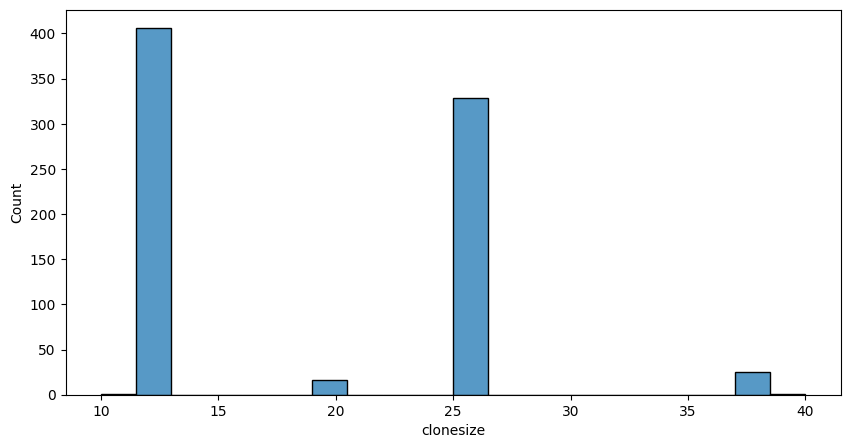

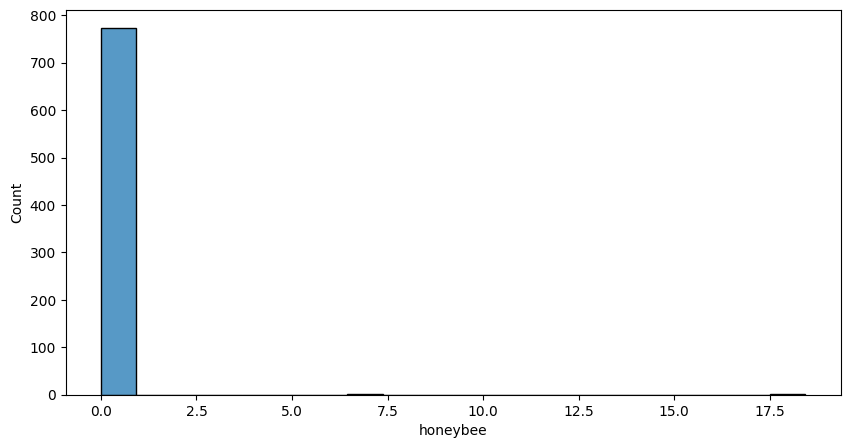

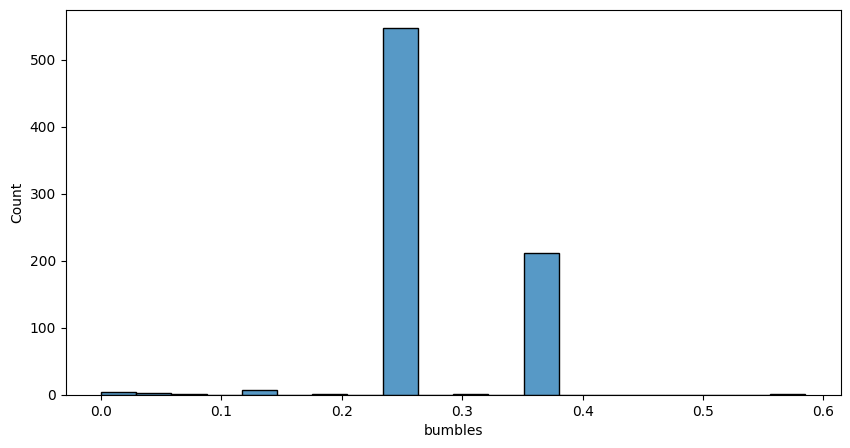

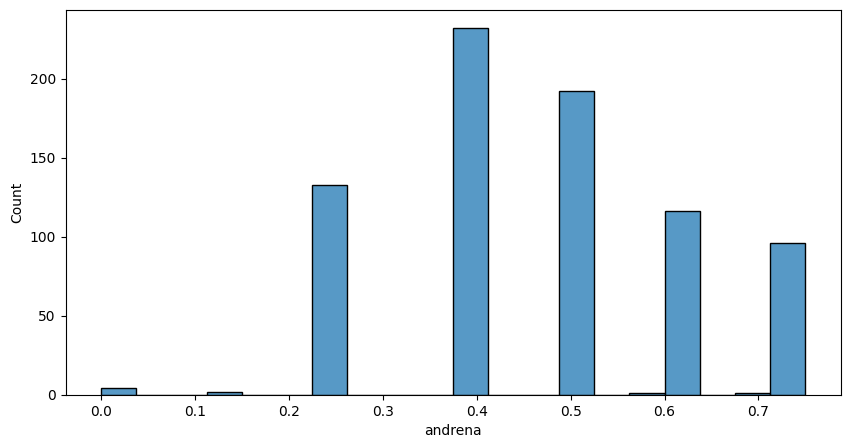

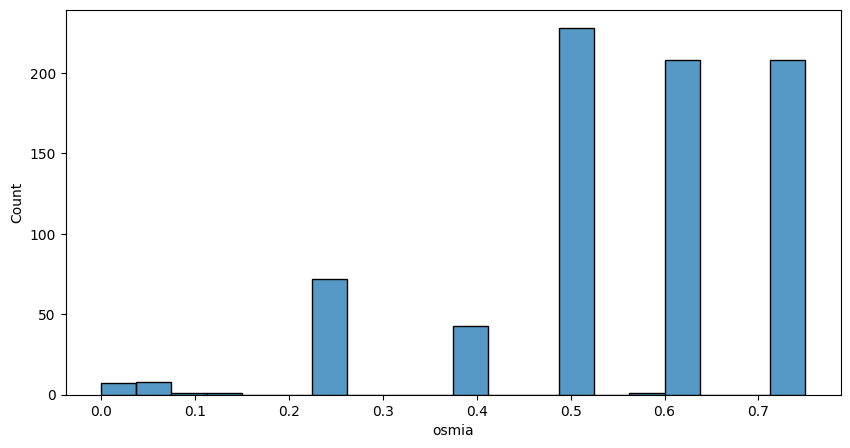

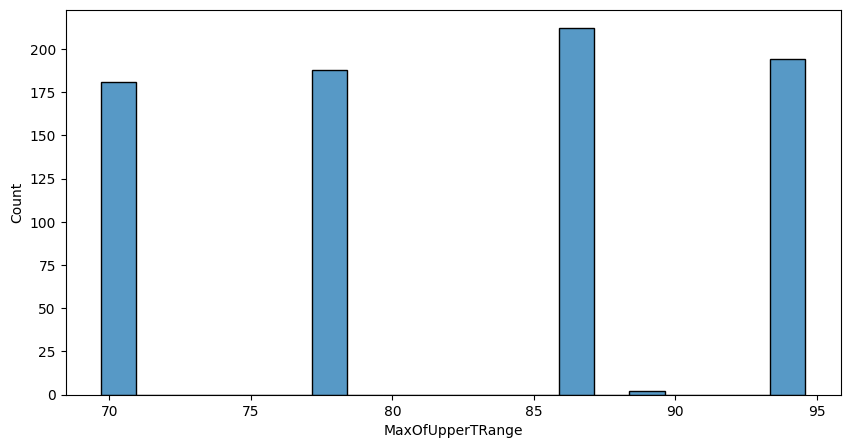

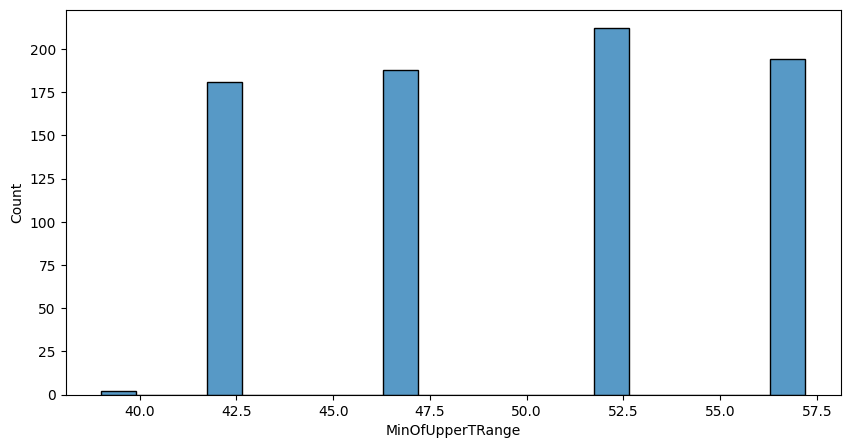

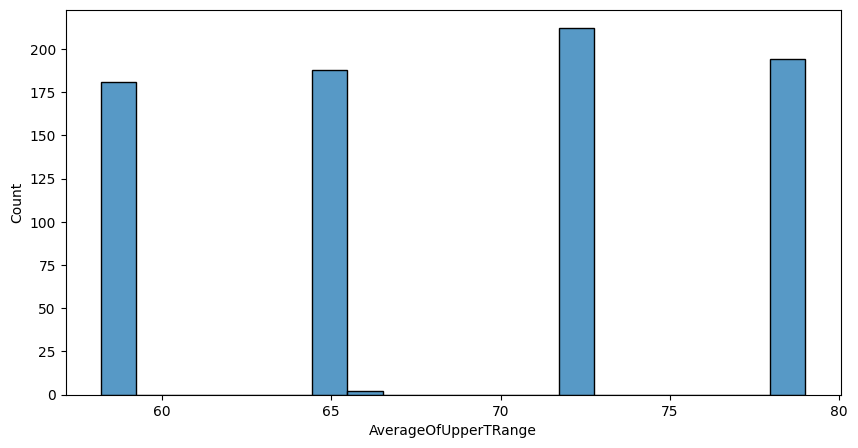

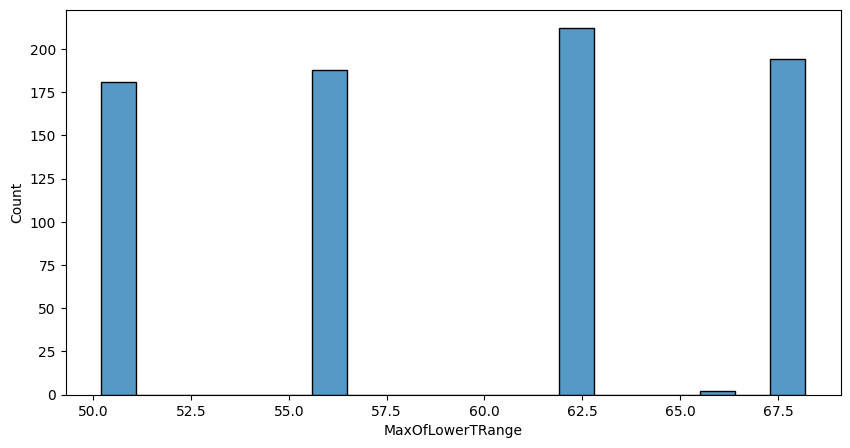

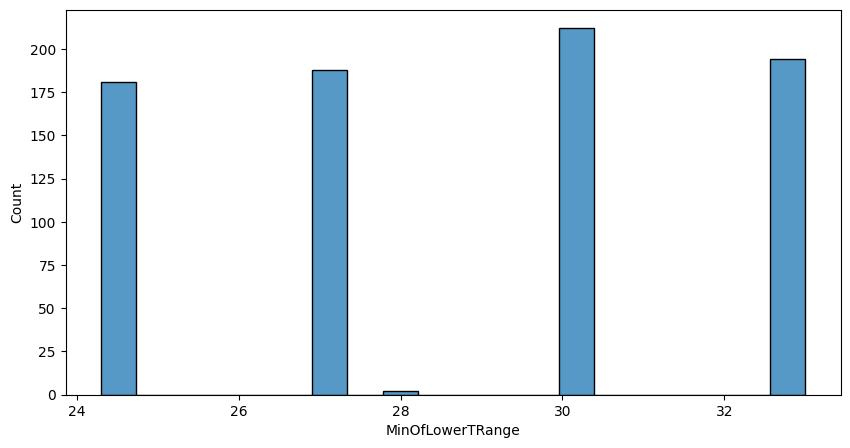

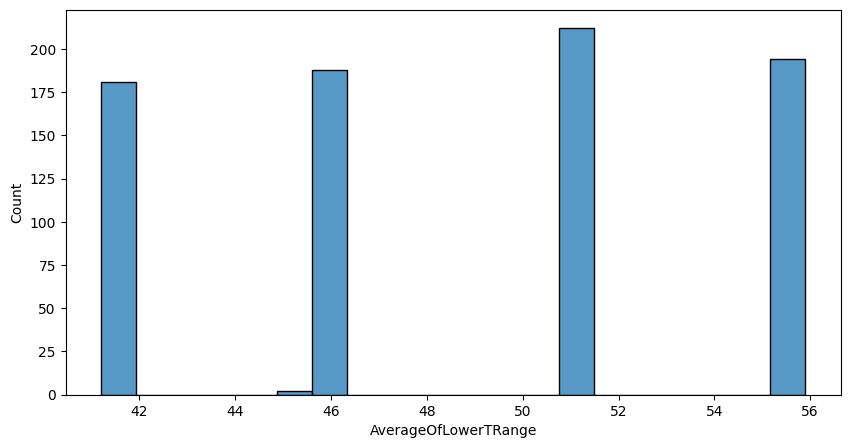

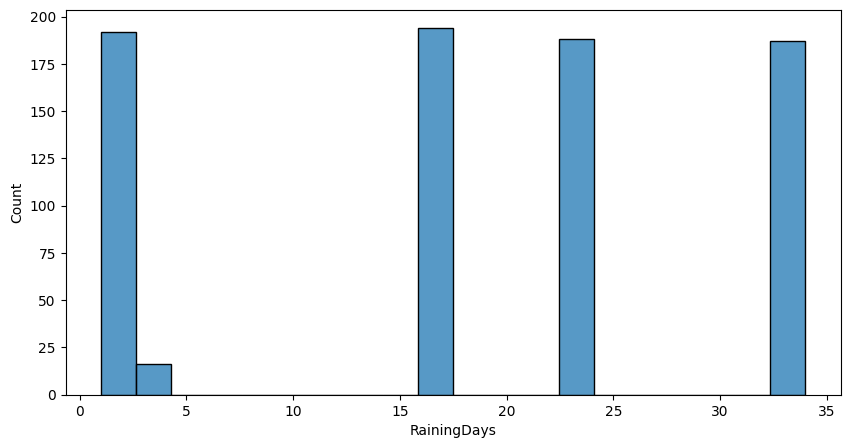

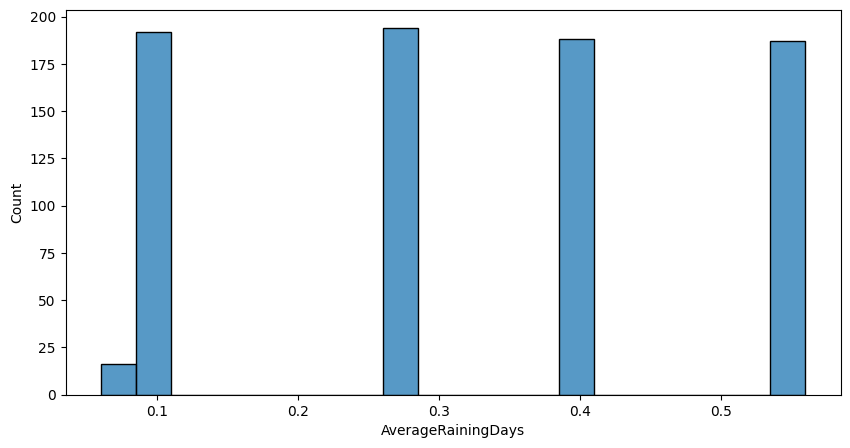

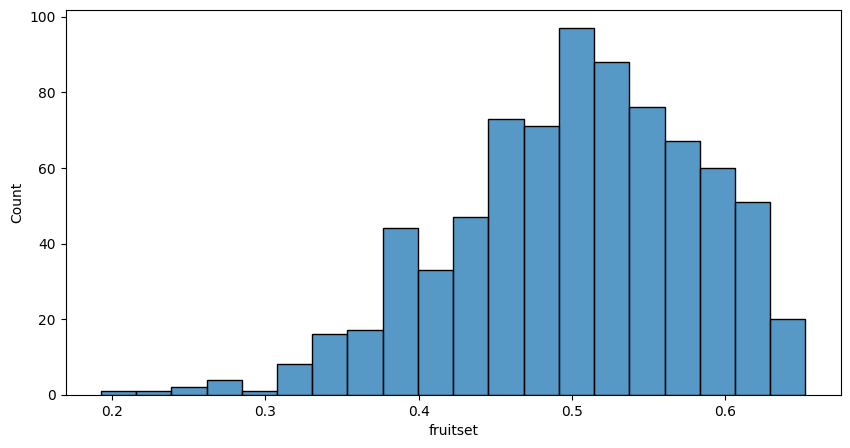

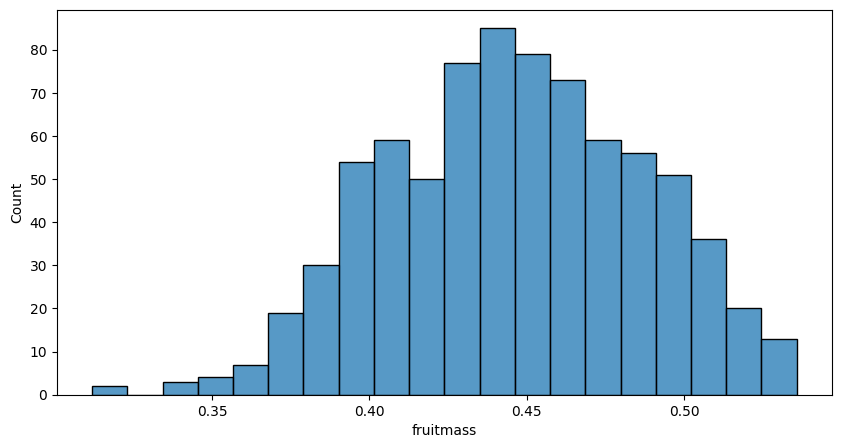

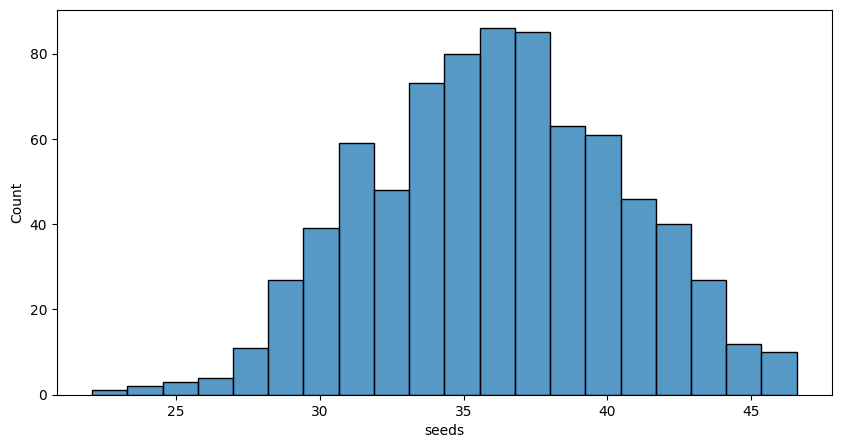

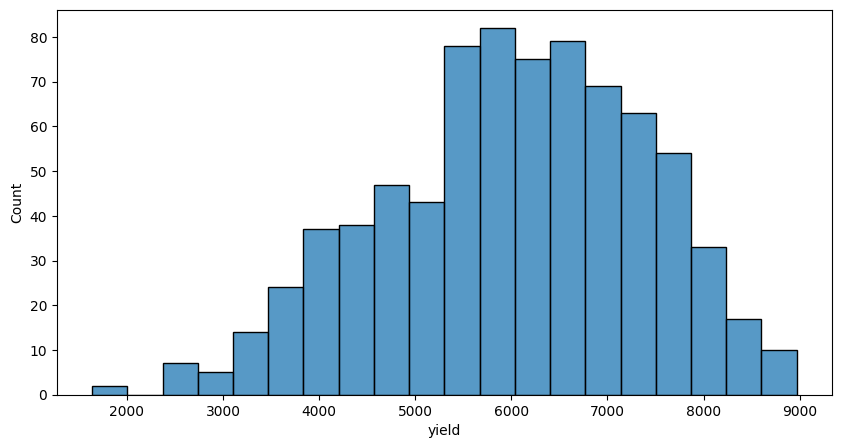

In [11]:
for i in col:
    plt.figure(figsize=(10,5))
    sb.histplot(df[i], bins=20)
    plt.show()

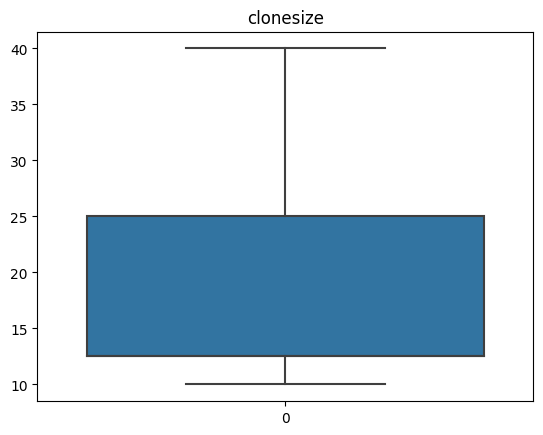

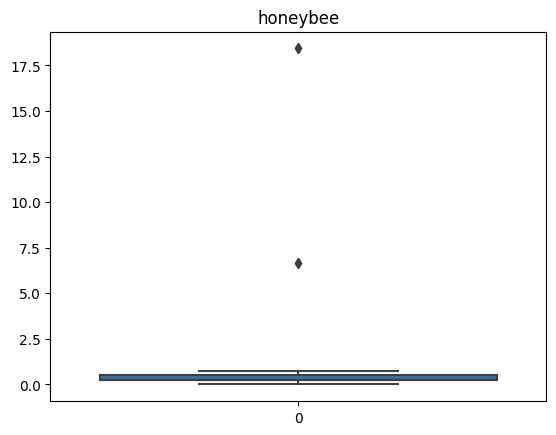

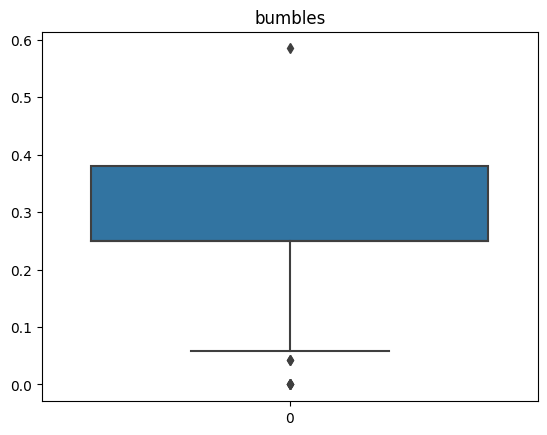

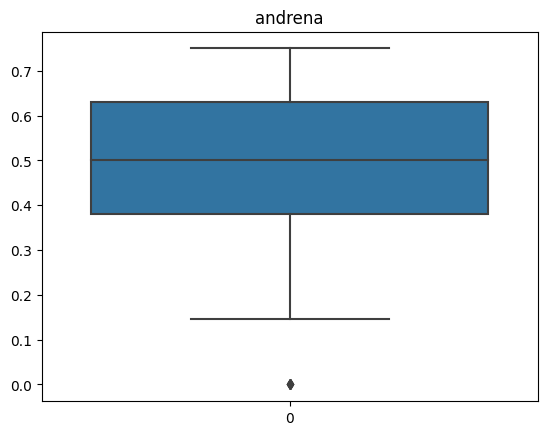

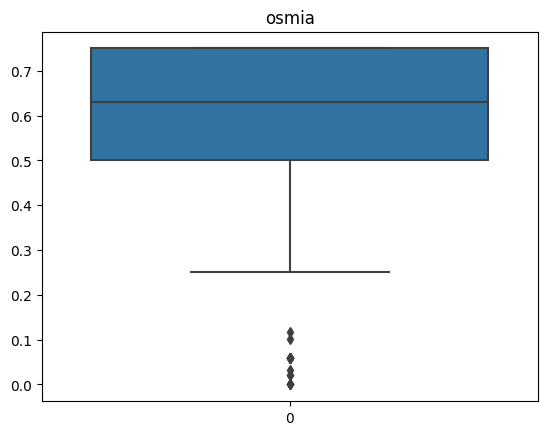

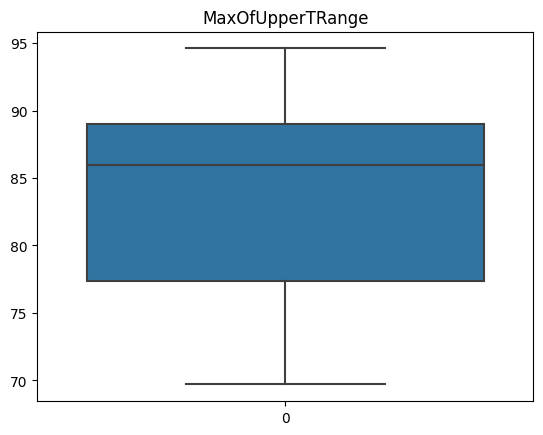

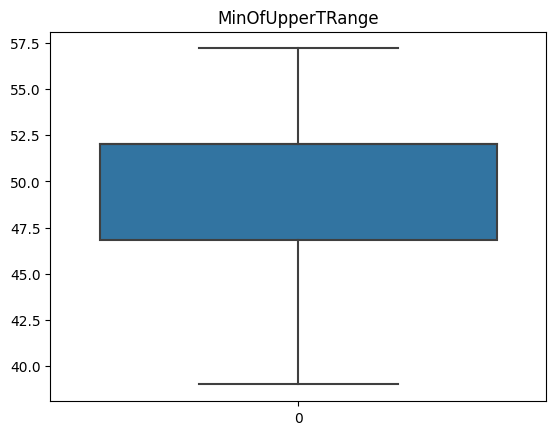

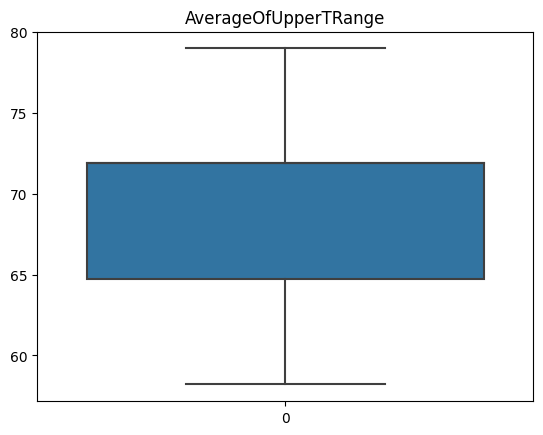

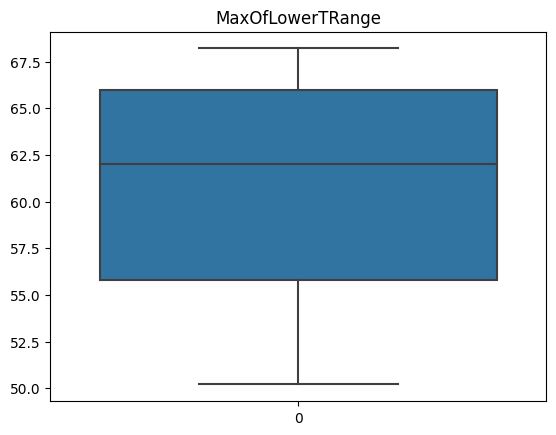

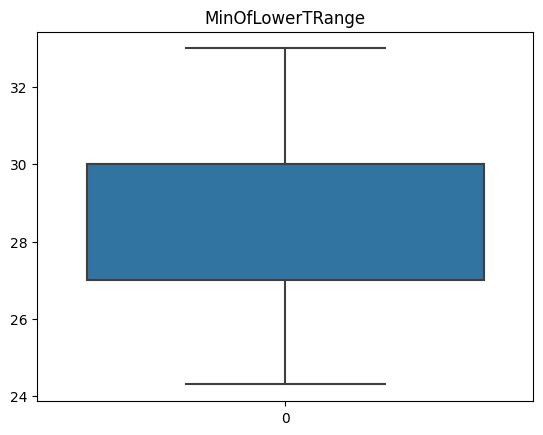

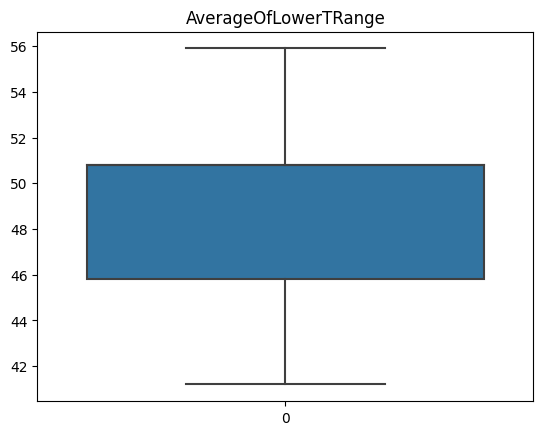

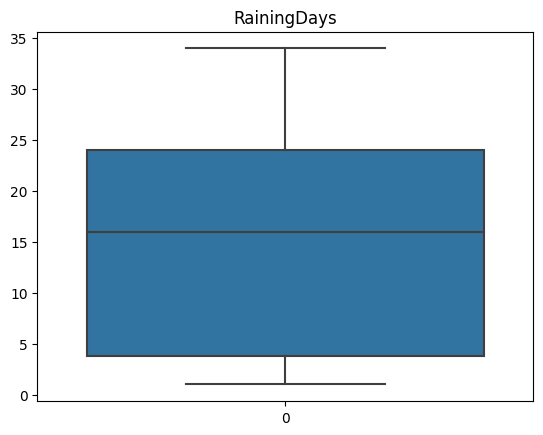

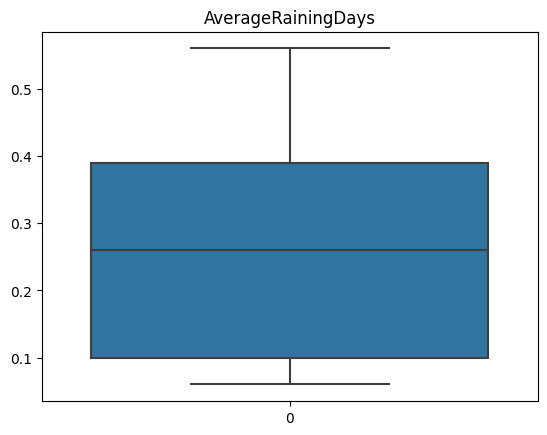

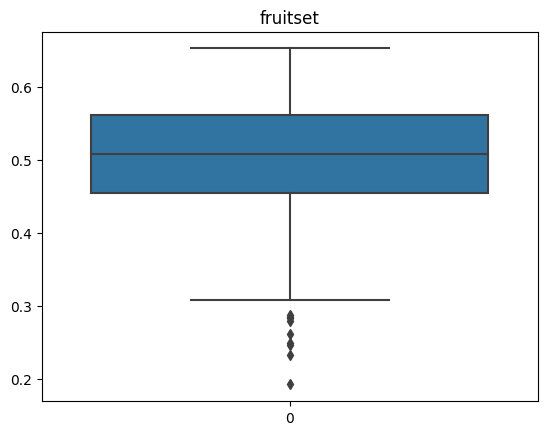

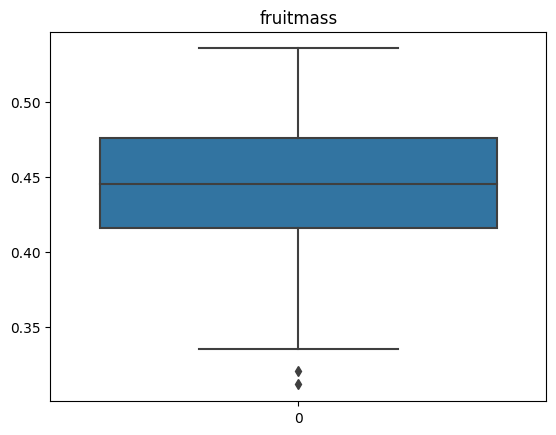

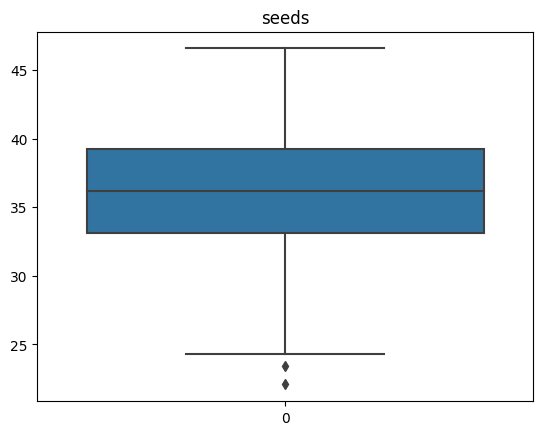

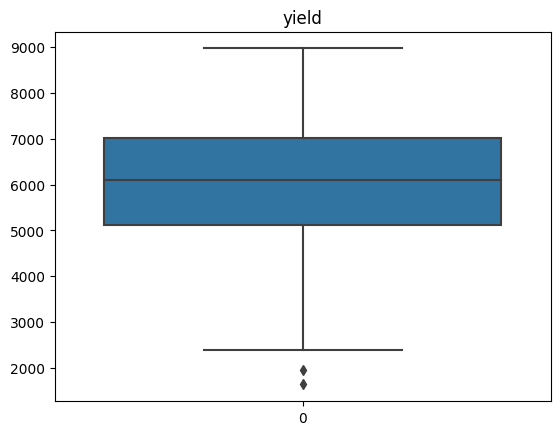

In [12]:
for i in col:
    sb.boxplot(data=df[i])
    plt.title(i)
    plt.show()

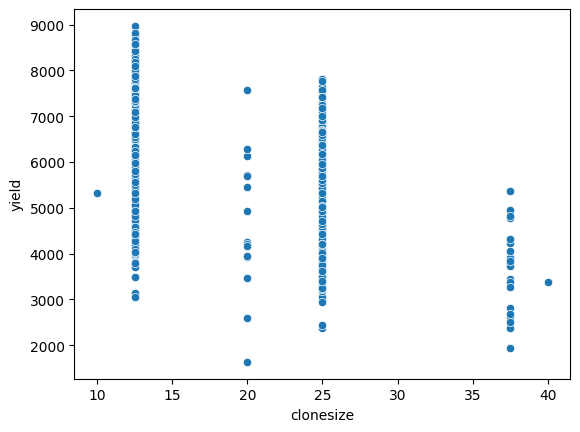

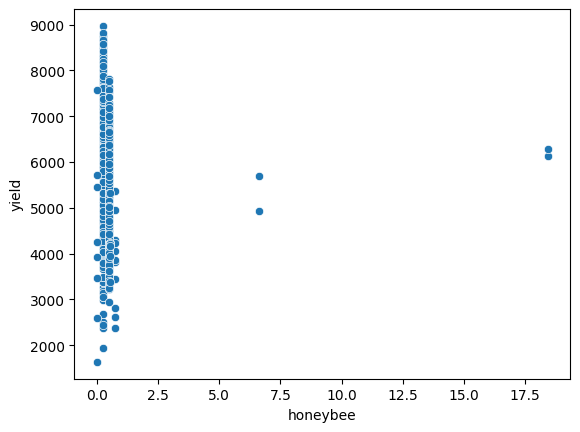

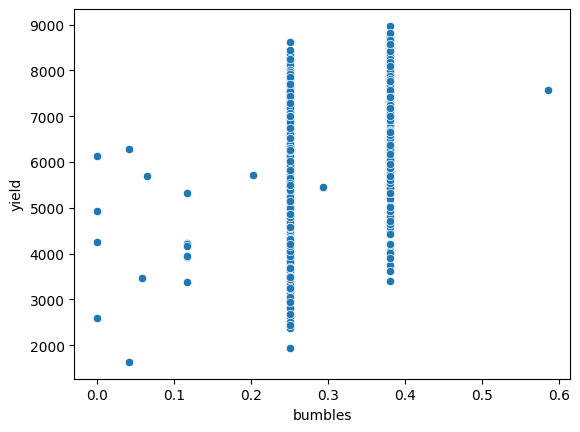

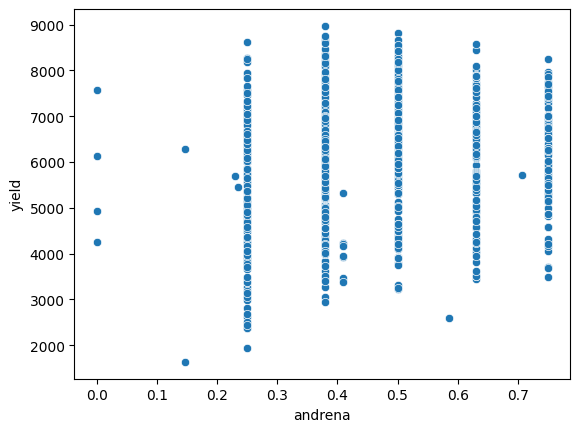

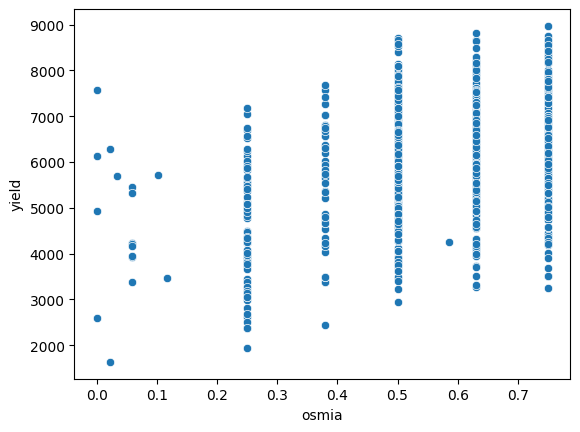

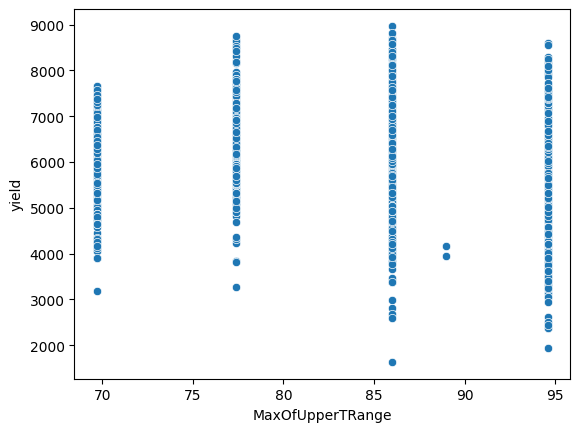

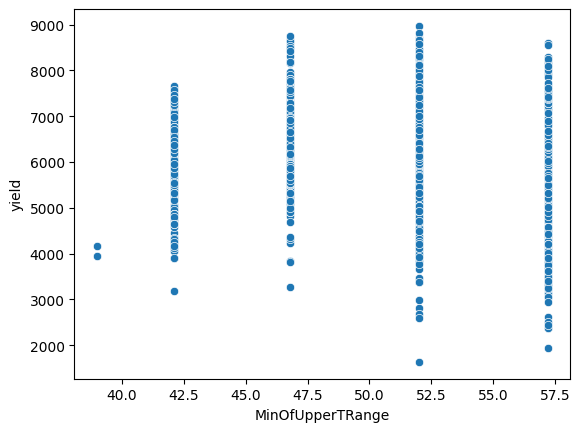

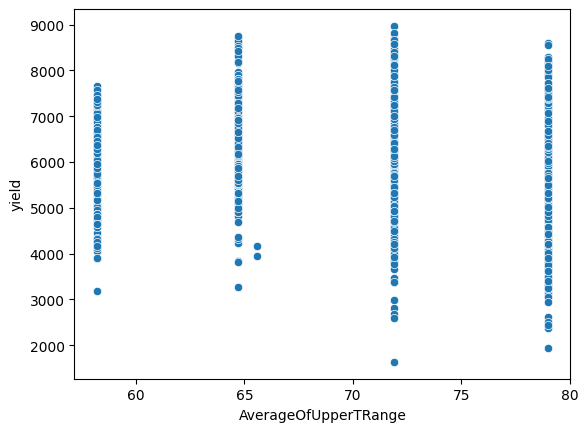

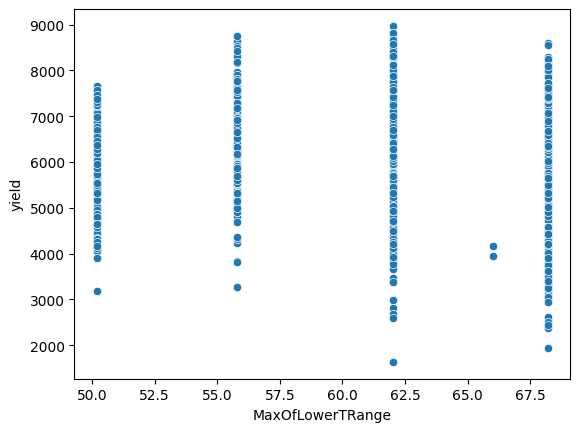

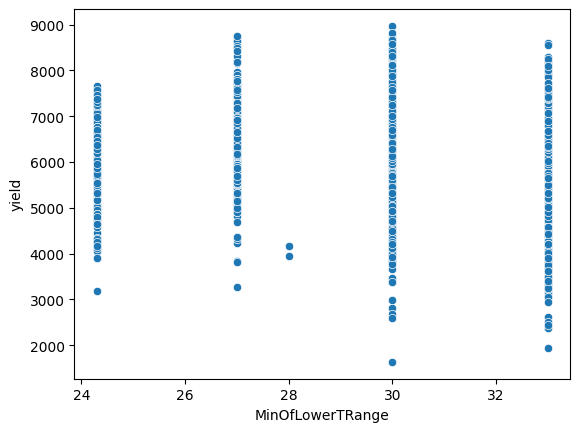

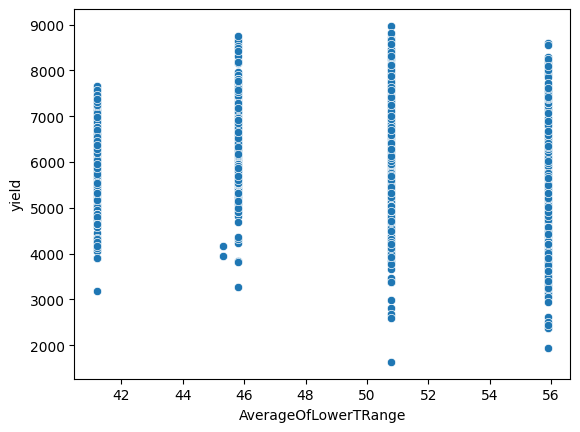

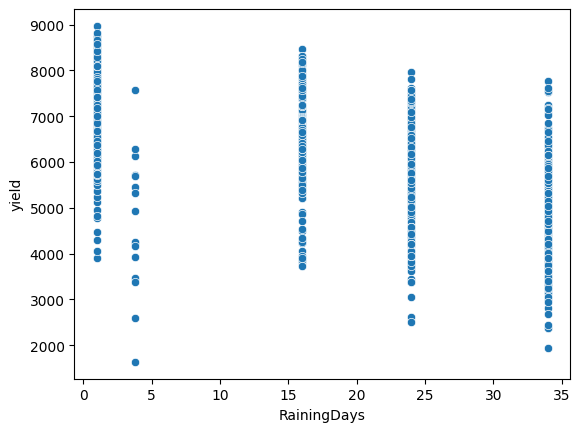

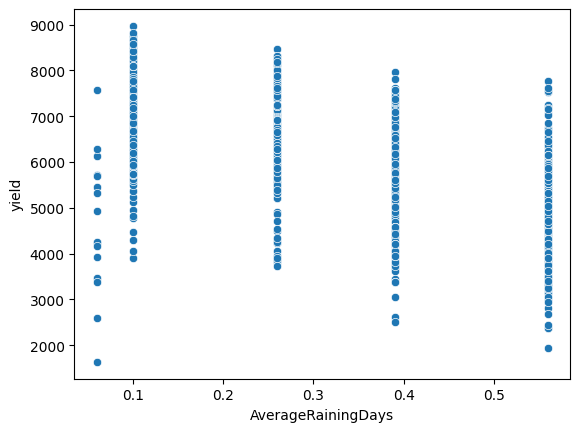

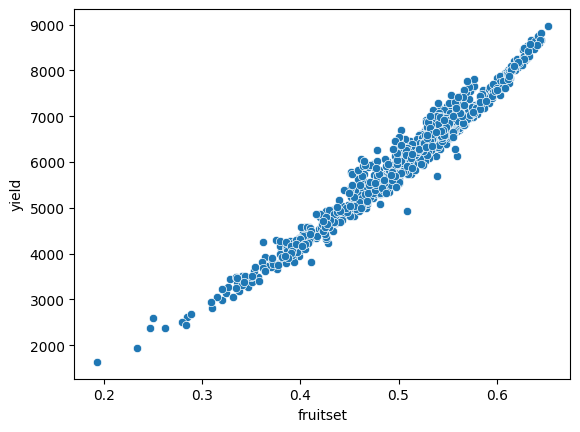

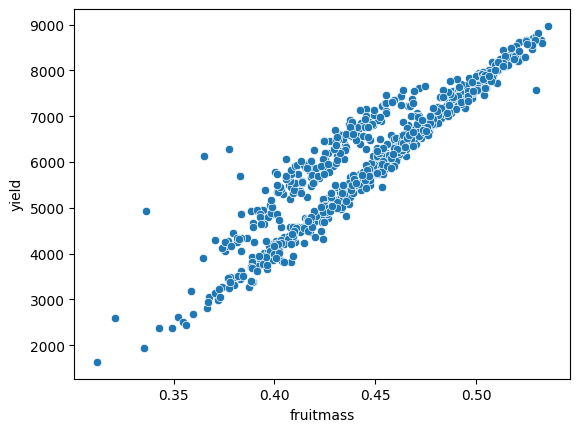

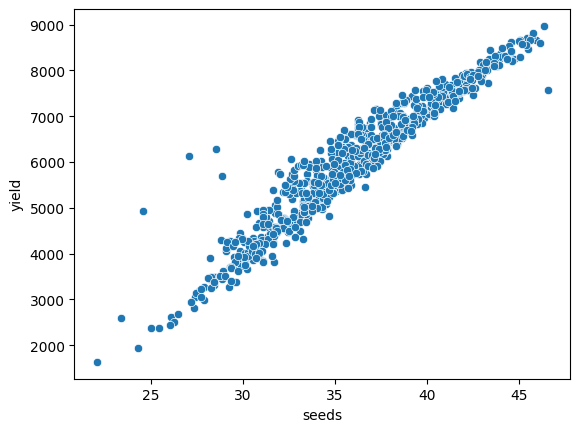

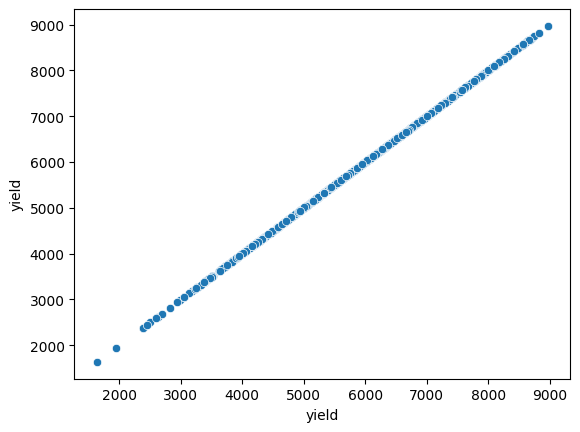

In [13]:
for i in col:
    sb.scatterplot(data=df, x=i, y='yield')
    plt.show()

<AxesSubplot: >

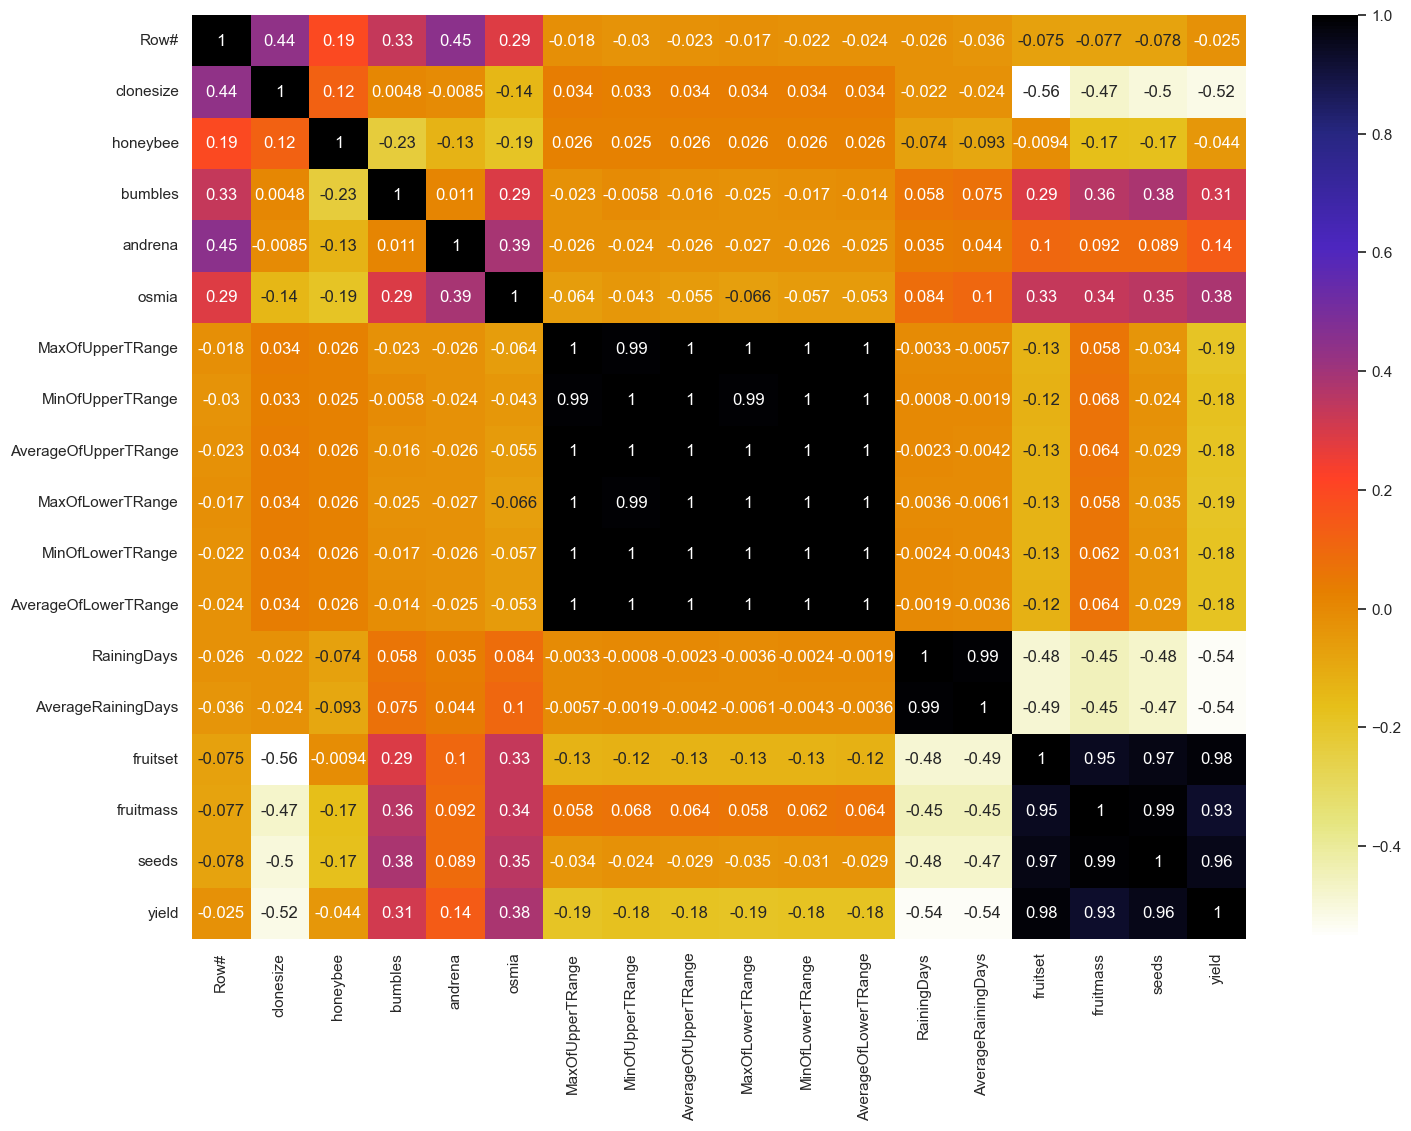

In [14]:
col = ['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield']
plt.figure(figsize=(17,12))
sb.set()
sb.heatmap(df.corr(), annot=True, cmap=plt.cm.CMRmap_r)

columns = ["yield","seeds","fruitmass","fruitset","osmia","honeybee","bumbles","andrena"]
possess outliers

In [15]:
bbry_data_process = df.drop(columns=['Row#', 'MaxOfUpperTRange', 'MinOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'RainingDays', 'honeybee', "fruitset", "fruitmass", "seeds"])
bbry_data_process

,clonesize,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays,yield
0,37.5,0.250,0.250,0.250,71.9,50.8,0.26,3813.165795
1,37.5,0.250,0.250,0.250,71.9,50.8,0.10,4947.605663
2,37.5,0.250,0.250,0.250,79.0,55.9,0.26,3866.798965
3,37.5,0.250,0.250,0.250,79.0,55.9,0.10,4303.943030
4,37.5,0.250,0.250,0.250,71.9,50.8,0.39,3436.493543
...,...,...,...,...,...,...,...,...
772,10.0,0.117,0.409,0.058,71.9,50.8,0.06,5333.873335
773,40.0,0.117,0.409,0.058,71.9,50.8,0.06,3373.436842
774,20.0,0.117,0.409,0.058,71.9,50.8,0.39,4203.027624
775,20.0,0.117,0.409,0.058,65.6,45.3,0.06,4166.299735


In [16]:
z = np.abs(stats.zscore(df))
print(z)

         Row#  clonesize  honeybee   bumbles   andrena     osmia  \
0    1.729823   2.678126   0.34026  0.488512  1.359549  1.846405   
1    1.725365   2.678126   0.34026  0.488512  1.359549  1.846405   
2    1.720906   2.678126   0.34026  0.488512  1.359549  1.846405   
3    1.716448   2.678126   0.34026  0.488512  1.359549  1.846405   
4    1.711990   2.678126   0.34026  0.488512  1.359549  1.846405   
..        ...        ...       ...       ...       ...       ...   
772  1.711990   1.253503   0.12253  2.494523  0.371655  2.982429   
773  1.716448   3.035546   0.12253  2.494523  0.371655  2.982429   
774  1.720906   0.176180   0.12253  2.494523  0.371655  2.982429   
775  1.725365   0.176180   0.12253  2.494523  0.371655  2.982429   
776  1.729823   0.176180   0.12253  2.494523  0.371655  2.982429   

     MaxOfUpperTRange  MinOfUpperTRange  AverageOfUpperTRange  \
0            0.405200          0.411198              0.414096   
1            0.405200          0.411198              

In [17]:
bbry_data_zscore = bbry_data_process[(z < 3).all(axis=1)]
bbry_data_zscore.shape

(764, 8)

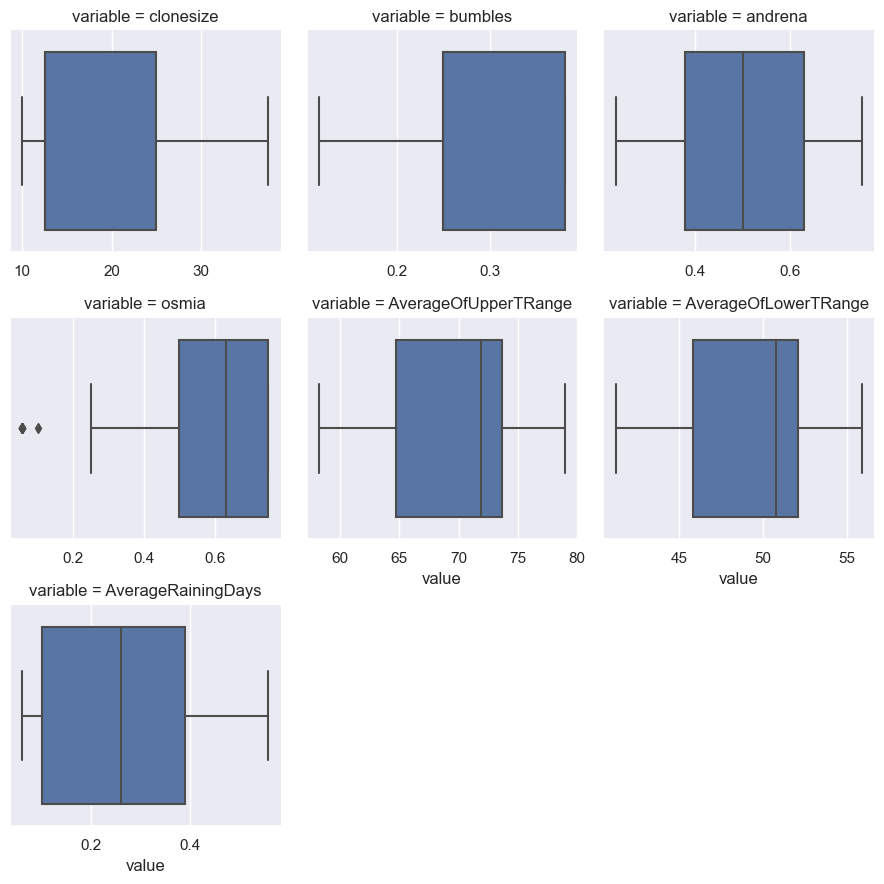

In [18]:
unpivot = pd.melt(bbry_data_zscore, bbry_data_zscore.columns[-1], bbry_data_zscore.columns[:-1])

g = sb.FacetGrid(unpivot, col="variable", col_wrap=3, sharex=False, sharey=False)
g.map(sb.boxplot, "value")


plt.show()



In [19]:
bbry_data_process = bbry_data_zscore
bbry_data_process

,clonesize,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays,yield
0,37.5,0.250,0.250,0.250,71.9,50.8,0.26,3813.165795
1,37.5,0.250,0.250,0.250,71.9,50.8,0.10,4947.605663
2,37.5,0.250,0.250,0.250,79.0,55.9,0.26,3866.798965
3,37.5,0.250,0.250,0.250,79.0,55.9,0.10,4303.943030
4,37.5,0.250,0.250,0.250,71.9,50.8,0.39,3436.493543
...,...,...,...,...,...,...,...,...
770,20.0,0.293,0.234,0.058,71.9,50.8,0.06,5449.421199
772,10.0,0.117,0.409,0.058,71.9,50.8,0.06,5333.873335
774,20.0,0.117,0.409,0.058,71.9,50.8,0.39,4203.027624
775,20.0,0.117,0.409,0.058,65.6,45.3,0.06,4166.299735


In [20]:
X = bbry_data_process.drop(["yield"], axis=1)
y = bbry_data_process['yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [21]:
X_train

,clonesize,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays
728,25.0,0.38,0.50,0.63,58.2,41.2,0.56
280,12.5,0.25,0.63,0.63,71.9,50.8,0.56
302,12.5,0.25,0.63,0.75,58.2,41.2,0.10
700,25.0,0.38,0.50,0.50,79.0,55.9,0.10
119,12.5,0.25,0.25,0.75,71.9,50.8,0.39
...,...,...,...,...,...,...,...
648,25.0,0.25,0.75,0.75,58.2,41.2,0.56
718,25.0,0.38,0.50,0.63,71.9,50.8,0.56
75,12.5,0.25,0.25,0.38,64.7,45.8,0.26
238,12.5,0.25,0.50,0.63,58.2,41.2,0.10


In [22]:
X_test

,clonesize,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays
460,25.0,0.25,0.38,0.50,79.0,55.9,0.10
151,12.5,0.25,0.38,0.38,71.9,50.8,0.39
744,25.0,0.38,0.50,0.75,58.2,41.2,0.56
529,25.0,0.25,0.50,0.63,64.7,45.8,0.26
403,12.5,0.38,0.50,0.50,71.9,50.8,0.26
...,...,...,...,...,...,...,...
34,25.0,0.25,0.25,0.25,64.7,45.8,0.10
367,12.5,0.38,0.38,0.50,64.7,45.8,0.39
755,25.0,0.38,0.63,0.50,58.2,41.2,0.26
411,12.5,0.38,0.50,0.50,64.7,45.8,0.26


In [23]:
def modelling(X_train, X_test, y_train, y_test,**kwargs):
    models=[]
    scores = {}
    if 'dct' in kwargs.keys() and kwargs['dct']:
        dct = DecisionTreeRegressor()
        dct.fit(X_train,y_train)
        y_pred = dct.predict(X_test)
        scores["dct"] = [sqrt(mean_squared_error(y_test,y_pred)),mean_absolute_error(y_test,y_pred),r2_score(y_test,y_pred)]
    if "rfor" in kwargs.keys() and kwargs['dct']:
        rfor = RandomForestRegressor()
        rfor.fit(X_train,y_train)
        y_pred = rfor.predict(X_test)
        scores["rfor"] = [sqrt(mean_squared_error(y_test,y_pred)),mean_absolute_error(y_test,y_pred),r2_score(y_test,y_pred)]
    if "svm" in kwargs.keys() and kwargs['svm']:
        svm = SVR()
        svm.fit(X_train,y_train)
        y_pred = svm.predict(X_test)
        scores["svm"] = [sqrt(mean_squared_error(y_test,y_pred)),mean_absolute_error(y_test,y_pred),r2_score(y_test,y_pred)]
    if "lr" in kwargs.keys() and kwargs['lr']:
        lr = LinearRegression()
        lr.fit(X_train,y_train)
        y_pred = lr.predict(X_test)
        scores["lr"] = [sqrt(mean_squared_error(y_test,y_pred)),mean_absolute_error(y_test,y_pred),r2_score(y_test,y_pred)]
    return scores
    
    

In [24]:
modelling(X_train, X_test, y_train, y_test,rfor=True,dct=True , svm =True, lr=True)

{'dct': [345.3726406148624, 264.2562693636364, 0.9244453861738046],
 'rfor': [275.389980630494, 199.30537645451926, 0.9519623892223402],
 'svm': [1254.5514865967862, 1038.8355572683236, 0.0030758727833994914],
 'lr': [536.4503820666681, 434.43638662264834, 0.8177178065768876]}

BEST MODEL IS RANDOM FOREST ,So Optimize it by hyperparamter tuning 

In [25]:
rf = RandomForestRegressor(random_state=40)
pprint("Parameters used by our current forest ")
pprint(rf.get_params())

'Parameters used by our current forest '
{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 40,
 'verbose': 0,
 'warm_start': False}


In [26]:
n_estimators = [int(x) for x in np.linspace(start=200,stop=2000,num=10)]
max_features = ["auto","sqrt"]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [27]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv =3,verbose=2,random_state = 42,n_jobs= -1)
rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [28]:
best_param = rf_random.best_params_
best_param

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 100,
 'bootstrap': True}

In [29]:
score = {}
base_model = RandomForestRegressor()
base_model.fit(X_train,y_train)
pred = base_model.predict(X_test)
score[base_model] = [sqrt(mean_squared_error(y_pred=pred ,y_true=y_test)),mean_absolute_error(y_pred=pred ,y_true=y_test),r2_score(y_pred=pred ,y_true=y_test)]
score[base_model]



[280.8861996532245, 203.39794365127466, 0.9500257905813013]

In [30]:
best_random = rf_random.best_estimator_
best_random.fit(X_train,y_train)
pred_best = best_random.predict(X_test)
score[best_random] = [sqrt(mean_squared_error(y_pred=pred_best ,y_true=y_test)),mean_absolute_error(y_pred=pred_best ,y_true=y_test),r2_score(y_pred=pred_best ,y_true=y_test)]
score[best_random]

[273.9066857838476, 197.31909313205176, 0.9524784722529704]

In [31]:
# param_grid = {
#     'bootstrap': [True],
#     'max_depth': [ 80,90, 100, 110,120],
#     'max_features': ["auto"],
#     'min_samples_leaf': [0,1,2,3],
#     'min_samples_split': [1,2,3,4,5],
#     'n_estimators': [700,800,900, 1000, 1100]
# }

# grid_search = GridSearchCV(estimator=rf,param_grid=param_grid,cv=3,n_jobs=-1,verbose=2)


In [32]:
# grid_search.fit(X_train,y_train)
# grid_search.best_params_

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 700}

In [35]:
shap.initjs()
shap_values = shap.TreeExplainer(best_random).shap_values(X_test)

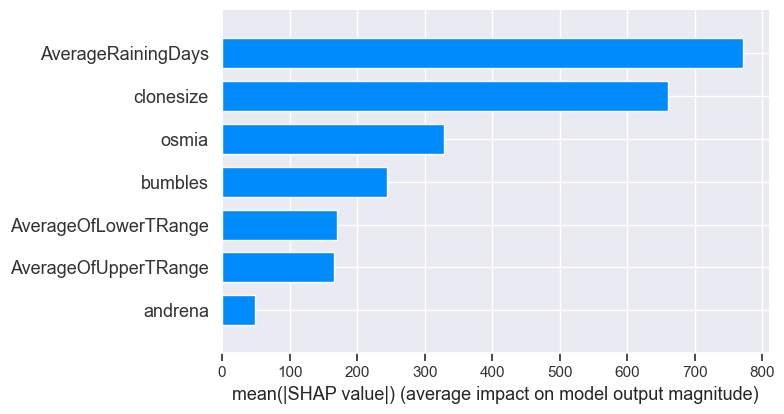

In [36]:
shap.summary_plot(shap_values, X_test, plot_type="bar")
